<a href="https://colab.research.google.com/github/AJ-21cm/AJ-21cm/blob/main/DB_RW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
import os
py_file_location = "/content/drive/My Drive/MS_thesis_work/"
sys.path.append(os.path.abspath(py_file_location))

In [ ]:
def scatter_Plot(xarr,yarr,xlabel,ylabel,title,dotsize=5,opacity=0.6,marker="o",fsize=(5,5)):
  fig=plt.figure(figsize=fsize)
  ax = fig.gca()
  plt.scatter(xarr,yarr,s=dotsize, c=None, marker=None, cmap=None, norm=None,
  vmin=None, vmax=None, alpha=opacity, linewidths=None, edgecolors=None, plotnonfinite=False, data=None)
  #plt.plot(xarr,yarr,label=labels,ls=":")
  plt.grid()
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.tick_params(bottom=True, top=True, left=True, right=True)
  plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
  ax.xaxis.set_minor_locator(AutoMinorLocator())
  ax.yaxis.set_minor_locator(AutoMinorLocator())
  #plt.legend()
def Box_Plot(xrr,xlabel,ylabel,title,label):
  plt.title(title)
  plt.boxplot(xarr,showmeans=True,  labels=label,notch=None, sym=None, vert=None, whis=None, positions=None, widths=None)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.grid()
def HistoGram(array,bins,normalized,width,xlabel,ylabel,alingm,title,fsize):
  fig=plt.figure(figsize=fsize)
  ax = fig.gca()
  plt.hist(array, bins=bins, range=None, density=normalized, weights=None, cumulative=False,
  bottom=None, histtype='bar', align=alingm, orientation='vertical', rwidth=width,
  log=False, color=None, label=None, stacked=False)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.tick_params(bottom=True, top=True, left=True, right=True)
  plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
  ax.xaxis.set_minor_locator(AutoMinorLocator())
  ax.yaxis.set_minor_locator(AutoMinorLocator())
  plt.grid()
def XY_plotting(axis,x,y,xlabel,ylabel,title,linestyle,linewidth,color,fsize):
  plt.plot(x,y,ls=linestyle,lw=linewidth,c=color)
  plt.grid()
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.tick_params(bottom=True, top=True, left=True, right=True)
  plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
  axis.xaxis.set_minor_locator(AutoMinorLocator())
  axis.yaxis.set_minor_locator(AutoMinorLocator())
def plotting_walker_time(degree,TimeS_dict,node):
  #degre=G.degree[a]
  node_timeS=TimeS_dict[node]
  l=np.array(node_timeS)
  #print(l.shape)
  plt.ylim(0,np.max(l[::,1])+10)
  plt.scatter(l[::,0],l[::,1],s=3,c=None, marker=None, cmap=None,
              norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, edgecolors=None, plotnonfinite=False, data=None)
  plt.xlabel("Time(s)")
  plt.ylabel("Number of Walkers")
  plt.title("Variation of Number of walkers with continous\n time on a node of degree "+str(degree))
  #print("total numbers of walkers % passes in time %"%(sum(l[::,0]),max(l[::,1])))
  #plt.yticks([i for i in range(m.ceil(max(l[::,1])))])
  #print(l)
  plt.show()
  #-----------------------------------------
  plt.title('Box plot')
  plt.boxplot(l[::,1],showmeans=True,  labels=None,notch=None, sym=None, vert=None, whis=None, positions=None, widths=None)
  plt.ylabel("Number of walkers")
  plt.grid()
  plt.show()

#Retriving Time series

In [ ]:
import plotting_fun
import Queue_methods
import Graph_functions
import Stats_EE_recurr_cal as sEE

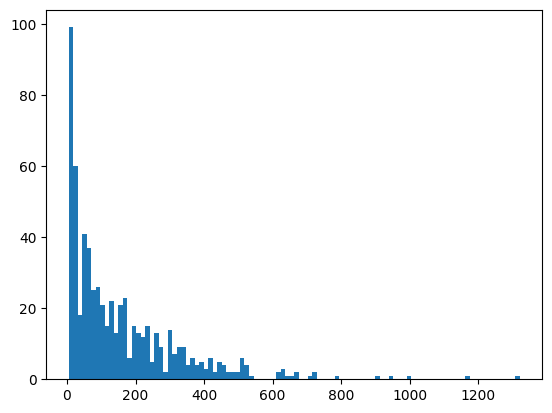

In [ ]:
TimeS1=plotting_fun.loadData("/content/drive/MyDrive/MS_thesis_work/DB_CTRW/CDB_data/Delhi__reccT_node_dict_5_2")
TimeS2=plotting_fun.loadData("/content/drive/MyDrive/MS_thesis_work/DB_CTRW/CDB_data/Delhi__EE_abs_diff_node_dict_5_2")
#s=[TimeS2[i][::] for i in TimeS2]
x,y,_=plt.hist(TimeS1[7],100)
#plt.yscale("log")

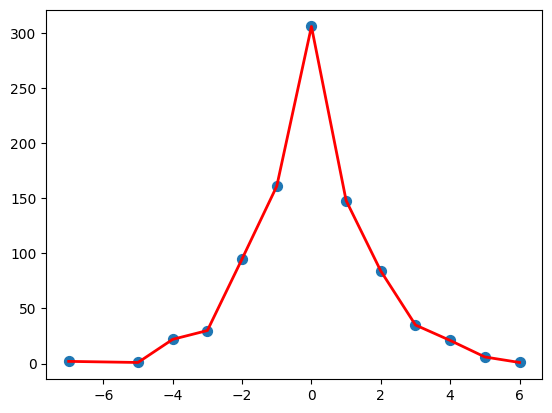

In [ ]:
arr=TimeS2[7]
unique, counts = np.unique(arr, return_counts=True)
plt.scatter(unique, counts,s=50)
plt.plot(unique, counts,ls='-',lw=2,c='r')

In [ ]:
j=0
for i in range(1092):
  if len(TimeS2[i])!=len(TimeS1[i]):
    print(len(TimeS2[i]),len(TimeS1[i]))

In [ ]:
x=[1,2,3,4,5,4,3,2]
x[:7]

[1, 2]

In [ ]:
def correlation_coeff(dict_1,dict_2,nodes):
  corr_dict={}
  for i in range(nodes):
    x=np.array(dict_1[i])
    y=np.array(dict_2[i])
    #minimum=min(len(x),len(y))
    #x=x[:minimum]
    #y=y[:minimum]
    a=np.mean(np.multiply(x,y))
    x_mean,y_mean=np.mean(x),np.mean(y)
    x_std,y_std=np.std(x),np.std(y)
    corr_dict[i]=(a-x_mean*y_mean)/(x_std*y_std)
    print((a-x_mean*y_mean)/(x_std*y_std))
  return corr_dict


array([[1.        , 0.07829648],
       [0.07829648, 1.        ]])

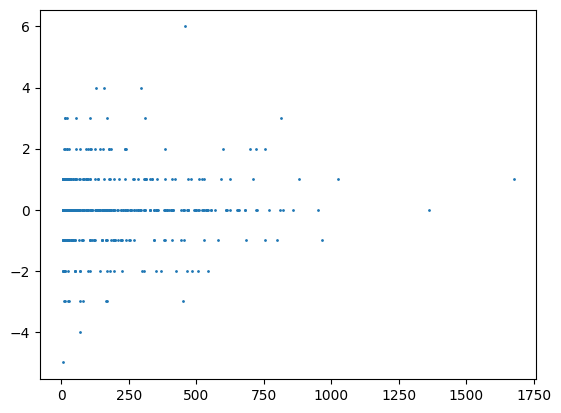

In [ ]:
plt.scatter(TimeS1[4],TimeS2[4],s=1)
np.corrcoef(TimeS1[4],TimeS2[4])

In [ ]:
c=correlation_coeff(TimeS1,TimeS2,1092)
plt.hist(c.values(),bins=50)
plt.xlabel("Pearson Correlation coefficient all nodes,"+r"$\alpha=2$")
plt.show()
plt.scatter(Gen_strength[::,4],c.values(),s=1)
plt.xlabel(r"$\phi,  \alpha=2$")
plt.ylabel("Corr coff")
plt.xscale("log")
plt.show()
plt.scatter(nodes_degree_dict.values(),c.values(),s=1)
plt.ylabel("Corr coff")
plt.xlabel("Degree")
plt.show()
corr1={}
for i in nodes_same_deg:
   corr1[i[0]]=np.mean(np.array([c[j] for j in i[1]]))
plt.scatter(corr1.keys(),corr1.values())
plt.xlabel("")
plt.xlabel(r"K,  $\alpha=2$")
plt.ylabel("Corr coff")
plt.show()
s=nodes_with_same_GenStren(Gen_strength[::,4])
corr={}
for i in s:
   corr[i[0]]=np.mean(np.array([c[j] for j in i[1]]))
plt.scatter(corr.keys(),corr.values())
plt.xlabel(r"$\phi,  \alpha=2$")
plt.ylabel("Corr coff")
plt.xscale("log")

In [ ]:
corr_gens={}
corrv=np.array(list(c.values()))
for i in s:
   corr_gens[i[0]]=np.mean(np.array([corrv[j] for j in i[1]]))

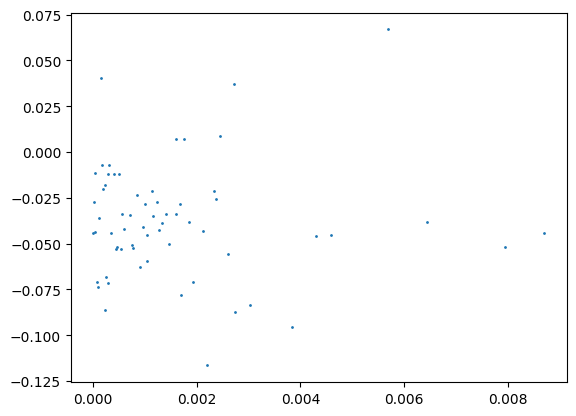

In [ ]:
plt.scatter(corr_gens.keys(),corr_gens.values(),s=1)

In [ ]:
TimeS=TimeS[100:,::]
DTime_S={i:TimeS[::,i] for i in range(nodes)}

In [ ]:
TS=plotting_fun.loadData("/content/drive/MyDrive/MS_thesis_work/Real_Traffic_sim/NewYork_TimeS_dict_birP_p1")

In [ ]:
TS=plotting_fun.loadData("/content/drive/MyDrive/MS_thesis_work/DB_CTRW/TSeries/Delhi_TimS_winT_5_alp_m_2")

In [ ]:
plt.scatter()

In [ ]:
adjacency_list=plotting_fun.loadData("/content/drive/MyDrive/MS_thesis_work/adjacency_list_Delhi_")
nodes_degree_dict={i:len(adjacency_list[i]) for i in adjacency_list}
nodes_same_deg=Graph_functions.nodes_with_same_Degree(nodes_degree_dict)
nodes=len(list(adjacency_list.keys()))
Degrees=list(set(nodes_degree_dict.values()))
nodes_each_deg=[i[1][0] for i in nodes_same_deg]

In [ ]:
help(Graph_function)

In [ ]:
nodes_degree_dict[nodes_each_deg[5]]

6

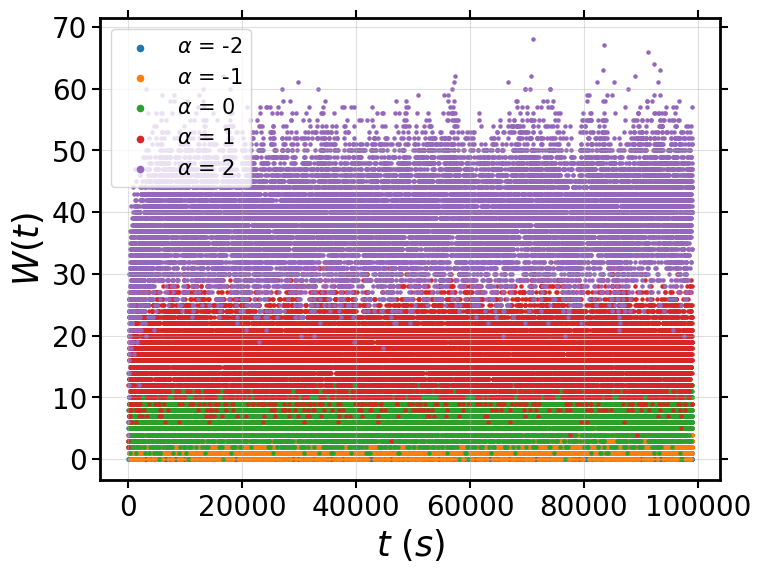

In [ ]:
font = {'family': 'serif',
         'color':  'black',
        'weight': 'normal',
        'size': 25}
#xlabel="t(s)"
xlabel=r"$\tau$"
xlabel=r'$t~(s)$'
ylabel=r"$W(t)$"
fig=plt.figure(figsize=(8,6))
ax = fig.gca()
node=nodes_each_deg[5]
for i,j in zip(["m_2","m_1","0","1","2"],[-2,-1,0,1,2]):
   TS=plotting_fun.loadData("/content/drive/MyDrive/MS_thesis_work/DB_CTRW/TSeries/Delhi_TimS_winT_5_alp_"+i)
   #TS=plotting_fun.loadData("/content/drive/MyDrive/MS_thesis_work/DB_CTRW/CDB_data/Delhi__reccT_node_dict_5_"+i)
   #TS=plotting_fun.loadData("/content/drive/MyDrive/MS_thesis_work/DB_CTRW/CDB_data/Delhi__EE_abs_diff_node_dict_5_"+i)
   arr=np.abs(np.array(TS[node]))
   #unique, counts = np.unique(arr, return_counts=True)
   #plt.scatter(unique, counts,s=30,label=r"$\alpha$ = "+ str(j))
   #plt.plot(unique, counts,ls='-',lw=2)
   #uniq=np.unique(arr)
   plt.scatter(arr[::,0],arr[::,1],s=5,label=r"$\alpha$ = "+ str(j),alpha=1)
   #print(min(arr))
   #plt.show()
   #arr=arr[::,1]
   #arr=np.log(np.array(TS[node]))
   bins=np.arange(np.min(arr),np.max(arr)+5,15)
   #x,y,_=plt.hist(arr,uniq,lw=1.5, density=False,histtype='step',align="left",cumulative=0,label=r"$\alpha$ = "+ str(j))
   #plt.xlim(0,800)
#plt.hist(bw_c,bins=200, density=True,histtype='step',cumulative=1)
plt.xlabel(xlabel,font)
plt.grid(alpha=0.4)
plt.legend(fontsize=15,markerscale=2)
plt.ylabel(ylabel,font)
#plt.xlim(-100,1000)
#plt.xscale("log")
#plt.yscale("log")
plt.tick_params(bottom=True, top=True, left=True, right=True,length=6, width=1.5)
plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,length=6, width=1.5)
ax.spines[['left','right','bottom','top']].set_linewidth(2)
#ax.xaxis.set_minor_locator(AutoMinorLocator())
#ax.yaxis.set_minor_locator(AutoMinorLocator())
#fig.tight_layout()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [ ]:
np.abs(np.array([-2,3,-4,-6,-1]))

array([2, 3, 4, 6, 1])

126


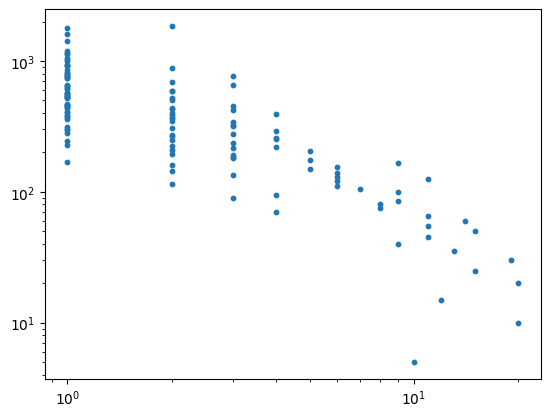

In [ ]:
#y=np.delete(y,len(y)-1)
print(len(y))
plt.scatter(x,y,s=10)
plt.xscale("log")
plt.yscale("log")

In [ ]:
min(arr)

0.0

In [ ]:
for i in range(1117):
  timeS=TS[i]
  plt.scatter(timeS[::,0],timeS[::,1])
  plt.title()

#Creating Dataframes

In [ ]:
pre_name="/content/drive/MyDrive/MS_thesis_work/DB_CTRW/CDB_data/"
df_node=pd.read_csv(pre_name+"Delhi_DB_10_5_stat_Nodewise_winT_5_scaleP_2.0.csv")
df_deg=pd.read_csv(pre_name+"Delhi_DB_10_5_stat_Degwise_winT_5_scaleP_2.0.csv")

In [ ]:
df_node

,Unnamed: 0,mw_m_2,sw_m_2,th_val_m_2,EE_m_2,m_recT_m_2,m_absDiff_m_2,mw_m_1,sw_m_1,th_val_m_1,...,th_val_1,EE_1,m_recT_1,m_absDiff_1,mw_2,sw_2,th_val_2,EE_2,m_recT_2,m_absDiff_2
0,0,6.123933,2.964189,12.052312,0.013686,182.523105,1.412200,4.450331,2.469238,9.388807,...,4.236476,0.015934,157.193959,0.671429,0.756578,0.933545,2.623668,0.026085,95.916586,0.519380
1,1,5.195243,2.538380,10.272002,0.014646,170.388601,1.338515,4.841624,2.420091,9.681807,...,7.439025,0.017726,140.948645,0.950071,2.758649,1.818622,6.395893,0.016641,150.449011,0.980243
2,2,6.874400,2.964400,12.803201,0.019342,124.888889,1.264052,5.549821,2.637646,10.825114,...,6.908213,0.025883,96.513672,0.995117,2.261552,1.641934,5.545419,0.020049,124.898990,0.807062
3,3,4.232463,2.066846,8.366156,0.015201,164.559068,0.883527,4.599970,2.150191,8.900351,...,7.143856,0.011792,211.008584,0.746781,2.591536,1.614701,5.820938,0.023761,105.069223,0.787234
4,4,5.355336,2.344609,10.044553,0.011565,216.105033,1.076586,4.947831,2.237085,9.422002,...,7.200259,0.012727,195.636183,0.831014,2.788041,1.686437,6.160914,0.012600,198.142570,0.690763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,1087,3.628908,1.963703,7.556313,0.019090,130.748344,0.870199,4.163224,2.097233,8.357690,...,7.833030,0.023004,108.769231,0.897802,3.216504,1.808587,6.833679,0.024191,103.422153,0.708464
1088,1088,4.840210,2.232671,9.305552,0.013737,179.198895,0.955801,3.963234,2.008482,7.980198,...,4.506822,0.017701,140.342857,0.625714,1.058128,1.018244,3.094617,0.010681,233.729216,0.353081
1089,1089,12.268320,3.538253,19.344827,0.013964,174.221014,1.293478,4.549215,2.137398,8.824011,...,1.616693,0.028206,88.677130,0.227599,0.094036,0.306727,0.707489,0.044972,55.595840,0.085393
1090,1090,28.446796,6.362698,41.172191,0.013030,187.601942,2.398058,6.910964,3.105603,13.122169,...,1.324342,0.016792,149.306184,0.250000,0.040554,0.206509,0.453572,0.019443,128.437500,0.079324


In [ ]:
nodes

In [ ]:
city_name="Delhi_"
adjacency_list=plotting_fun.loadData("/content/drive/MyDrive/MS_thesis_work/adjacency_list_"+city_name)
nodes_degree_dict={i:len(adjacency_list[i]) for i in adjacency_list}
nodes_same_deg=Graph_functions.nodes_with_same_Degree(nodes_degree_dict)
nodes=len(list(adjacency_list.keys()))
Degrees=list(set(nodes_degree_dict.values()))

In [ ]:
Gen_strength=np.zeros((nodes,5))

NameError: ignored

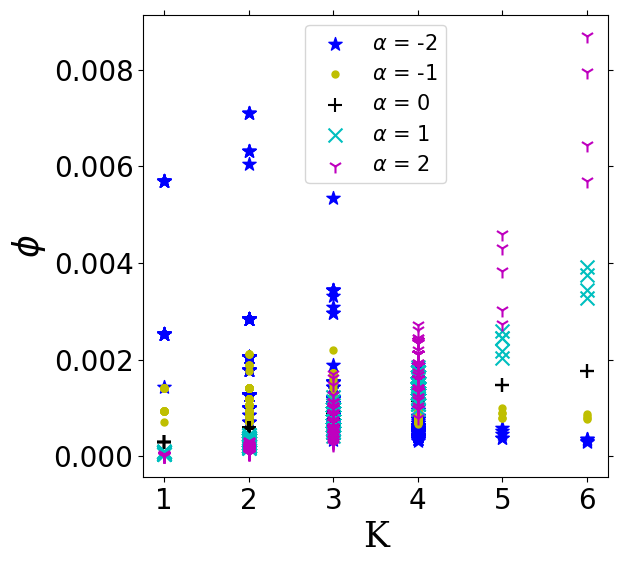

In [ ]:
#Generalized strength
font = {'family': 'serif',
         'color':  'black',
        'weight': 'normal',
        'size': 25}
xlabel="K"
ylabel=r"$\phi$"
indx=0
fig=plt.figure(figsize=(6,6))
ax = fig.gca()
for alp,j,c in zip([-2,-1,0,1,2],['*','.','+','x','1'],['b','y','k','c','m']):
  strength={i:(nodes_degree_dict[i]**alp)*sum(np.array([nodes_degree_dict[j] for j in adjacency_list[i]],dtype=float)**alp) for i in range(nodes)}
  total=sum(strength.values())
  strength={i:strength[i]/total for i in strength}
  keyss=strength.keys()
  degs=[nodes_degree_dict[i] for i in keyss]
  strength_val=np.array(list(strength.values()))
  Gen_strength[::,indx]=strength_val
  indx+=1
  plt.scatter(degs,strength_val,s=100,c=c,marker=j,label=r"$\alpha$ = "+str(alp),alpha=1)
plt.xlabel(xlabel,font)
#plt.grid(alpha=0.5)
plt.legend(loc="best",fontsize=15)
plt.ylabel(ylabel,font)
#plt.yscale("log")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.xscale("log")
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
#ax.xaxis.set_minor_locator(AutoMinorLocator())
#ax.yaxis.set_minor_locator(AutoMinorLocator())
#fig.tight_layout()
plt.scatter([1,2,3,4,5,6],l,c='k',s=100,marker='+')
#plt.savefig("/content/drive/MyDrive/MS_thesis_work/images/GenS_deg_withLog.png")
plt.show()

In [ ]:
Gen_strength=plotting_fun.loadData("/content/drive/MyDrive/MS_thesis_work/Gen_strength_"+city_name)

In [ ]:
l=np.unique(Gen_strength[::,2])

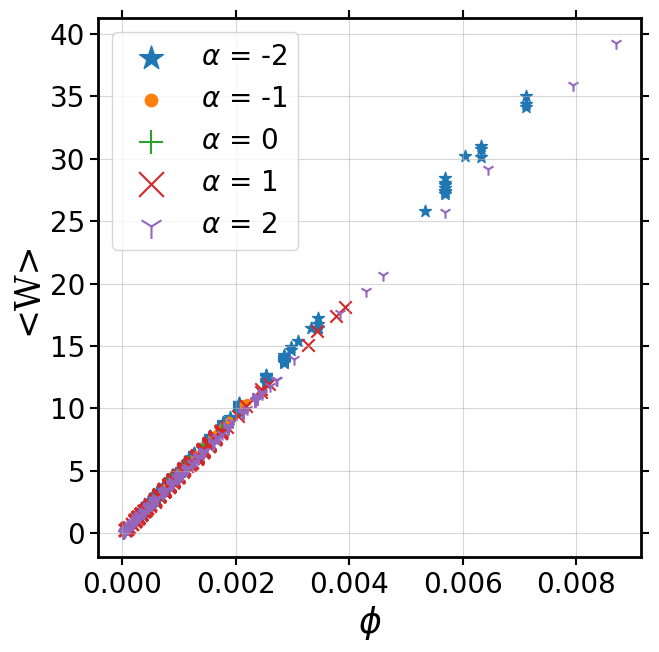

In [ ]:
#Generalized strength
font = {'family': 'serif',
         'color':  'black',
        'weight': 'normal',
        'size': 25}
#xlabel="K"
xlabel=r"$\phi$"
ylabel="<W>"
#ylabel=r"$\sigma$"
#ylabel="Frequency"
#xlabel=r"$\sigma$" #r"$P_{EE}$"
indx=0
fig=plt.figure(figsize=(7,7))
ax = fig.gca()
indx=0
for i,j,k in zip(["m_2","m_1","0","1","2"],[-2,-1,0,1,2],['*','.','+','x','1']):
  arr=df_node["mw_"+i]
  #bins=np.arange(0,np.max(arr)+1,1)
  plt.scatter(Gen_strength[::,indx],arr,s=80,marker=k,label=r"$\alpha$ = "+str(j),alpha=1)
  #plt.scatter(Gen_strength[::,indx],arr,s=25,marker=k,label=r"$\alpha$ = "+str(j),alpha=0.5)
  #plt.scatter(Gen_strength[::,indx],arr,s=25,marker=k,label=r"$\alpha$ = "+str(j),alpha=0.6)
  #plt.hist(arr,bins, lw=2,density=False,histtype='step',align="mid",cumulative=0,label=r"$\alpha$ = "+ str(j))
  indx+=1
plt.xlabel(xlabel,font)
plt.grid(alpha=0.5)
#plt.xlim(-1,20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc="best",fontsize=20,markerscale=2,frameon=True)
plt.ylabel(ylabel,font)
#plt.yscale("log")
#plt.xscale("log")
plt.tick_params(bottom=True, top=True, left=True, right=True,length=6, width=1.5)
plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,length=6, width=1.5)
#ax.xaxis.set_minor_locator(AutoMinorLocator())
#ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.spines[['left','right','bottom','top']].set_linewidth(2)
#fig.tight_layout()
plt.show()

(array([ 19.,   0.,   0.,   0.,   0.,  33.,  68.,   1.,   0.,   0.,   0.,
        349., 354.,   1.,   0.,   0.,   0., 122., 136.,   0.,   0.,   0.,
          0.,   3.,   2.,   0.,   0.,   0.,   0.,   4.]),
 array([1.35058835, 1.58311533, 1.81564231, 2.04816928, 2.28069626,
        2.51322324, 2.74575021, 2.97827719, 3.21080417, 3.44333114,
        3.67585812, 3.9083851 , 4.14091208, 4.37343905, 4.60596603,
        4.83849301, 5.07101998, 5.30354696, 5.53607394, 5.76860091,
        6.00112789, 6.23365487, 6.46618184, 6.69870882, 6.9312358 ,
        7.16376277, 7.39628975, 7.62881673, 7.8613437 , 8.09387068,
        8.32639766]),
 <BarContainer object of 30 artists>)

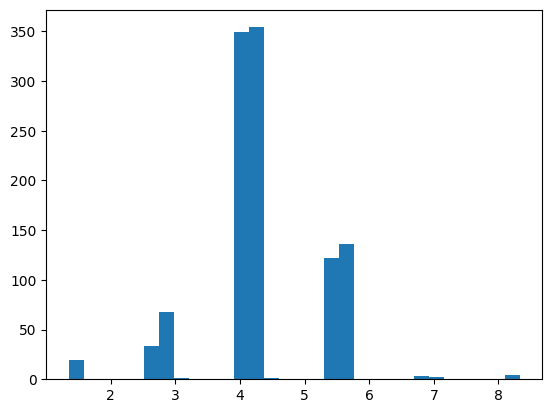

In [ ]:
plt.hist(df_node["mw_0"],30)

In [ ]:
un_arr=np.unique(Gen_strength[::,0])
len(un_arr),len(Gen_strength[::,4])

(63, 1092)

In [ ]:
def nodes_with_same_GenStren(Gen_strength):  #Function defined for obtaining a list of list containing nodes of same degree
  Gen_stren=np.unique(Gen_strength)
  nodes_GenStren=[]
  for i in Gen_stren:
    x=[]
    for j,k in enumerate(Gen_strength):
      if i==k:
         x.append(j)
    nodes_GenStren.append([i,x])
  return nodes_GenStren

In [ ]:
s=nodes_with_same_GenStren(Gen_strength[::,4])
len(s)

63

In [ ]:
EE_gens={}
EE=np.array(df_node["EE_2"])
for i in s:
   EE_gens[i[0]]=np.mean(np.array([EE[j] for j in i[1]]))

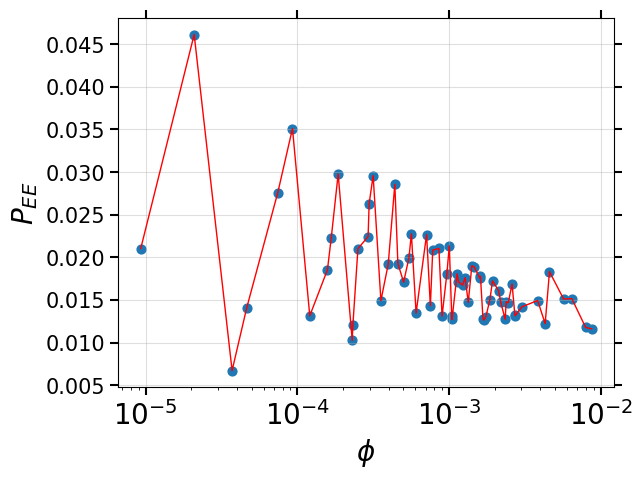

In [ ]:
xlabel=r"$\phi$"
ylabel=r"$P_{EE}$"
plt.scatter(EE_gens.keys(),EE_gens.values(),s=40)
plt.plot(EE_gens.keys(),EE_gens.values(),lw=1,ls='-',c='r')

plt.xlabel(xlabel,font)
plt.ylabel(ylabel,font)
plt.grid(alpha=0.4)
plt.tick_params(bottom=True, top=True, left=True, right=True,length=6, width=1.5)
plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,length=6, width=1.5)

plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
#plt.yscale("log")
plt.xscale("log")

In [ ]:
edge_len=plotting_fun.loadData("/content/drive/MyDrive/MS_thesis_work/SG_Edge_length_Delhi_")

In [ ]:
sum(edge_len.values())

99506.64545537154

In [ ]:
def edges_from_adj_list(adjacency_list):
    edges=set()
    for i in adjacency_list:
      for j in adjacency_list[i]:
          if i<j:
            edges.add((i,j))
          else:
            edges.add((j,i))
    edges = list(edges)
    return edges

In [ ]:
edges=edges_from_adj_list(adjacency_list)
len(edges)

1528

In [ ]:
#Degree correlation function
degree_corr={}
for i in range(nodes):
  degree_corr[i]=sum([nodes_degree_dict[j] for j in adjacency_list[i]])/nodes_degree_dict[i]


In [ ]:
degree_corr_deg={i[0]:np.mean(np.array([degree_corr[j] for j in i[1]])) for i in nodes_same_deg}

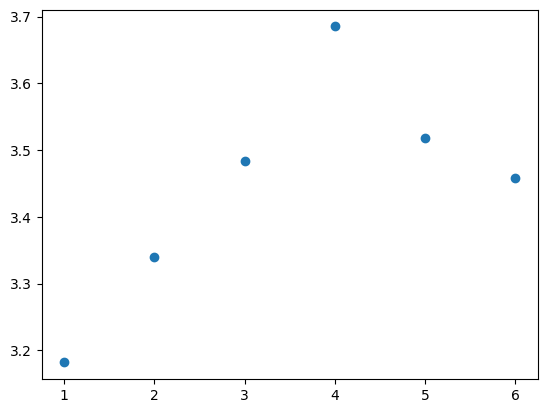

In [ ]:
plt.scatter(degree_corr_deg.keys(),degree_corr_deg.values())

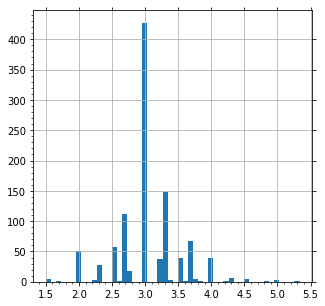

In [ ]:
HistoGram(degree_corr.values(),50,False,1,"","","mid","",(5,5))

In [ ]:
import numpy as np
import math as m
import pickle
from collections import OrderedDict
import pandas as pd
import sys

def storeData(db,file_name):
    # Its important to use binary mode
    dbfile = open(file_name, 'wb')
    # source, destination
    pickle.dump(db, dbfile)
    dbfile.close()
def loadData(file_name):
    # for reading also binary mode is important
    dbfile = open(file_name, 'rb')
    db = pickle.load(dbfile)
    dbfile.close()
    return db

def nodes_with_same_Degree(node_Degree_dict):
  Degrees=list(set(node_Degree_dict.values()))
  nodes_degree=[]
  for i in Degrees:
    x=[]
    for j,k in node_Degree_dict.items():
      if i==k:
         x.append(j)
    nodes_degree.append([i,x])
  return nodes_degree

def walkers_statistic_nodewise(Ctime_series_dict,nodes):
  dic_mean_walkers={}
  dic_std_walkers={}
  for a in range(nodes):
    new_array=np.array(Ctime_series_dict[a])
    dic_mean_walkers[a]=np.mean(np.array([i[1] for i in new_array ]))
    dic_std_walkers[a]=np.std(np.array([i[1] for i in new_array]))
  return dic_mean_walkers,dic_std_walkers

#----------------------------------------------------------------------------------------------------------------
def walkers_statistic_degreewise(nodes_with_same_degrees,mean_walkers_dic ,std_walkers_dic):
  dic_meanW_PER_node_degreewise={}
  dic_stdW_PER_node_degreewise={}
  for nodes in nodes_with_same_degrees:
    deg=nodes[0]
    sameDeg_nodes=nodes[1]
    dic_meanW_PER_node_degreewise[deg]=[mean_walkers_dic[n] for n in sameDeg_nodes ]
    dic_stdW_PER_node_degreewise[deg]=[std_walkers_dic[n] for n in sameDeg_nodes]
  Avg_walk_degreewise=np.array([[i,np.mean(np.array(dic_meanW_PER_node_degreewise[i]))] for i in dic_meanW_PER_node_degreewise])
  Std_walk_degreewise=np.array([[j,np.mean(np.array(dic_stdW_PER_node_degreewise[j]))] for j in dic_stdW_PER_node_degreewise])
  return Avg_walk_degreewise,Std_walk_degreewise


#Extreme event probability calculation

def EE_Prob(Nodes,nodes_with_same_degrees,Scaling_factor,CTimeS_each_node,mean_walkers_dic,std_walkers_dic):
  Extreme_event_nodewise={}
  timeS_size=float(np.size(np.array(CTimeS_each_node[0])))
  thresh_hold_Arr={}
  for node in range(Nodes):
    node_TS=np.array(CTimeS_each_node[node])
    walkers_array=node_TS[::,1]
    threshold=mean_walkers_dic[node]+Scaling_factor*std_walkers_dic[node]
    thresh_hold_Arr[node]=threshold
    Extreme_event_nodewise[node]=np.count_nonzero((np.where( walkers_array>threshold, 1,0)))/timeS_size
  Extreme_event_prob_degreewise={}
  for i in nodes_with_same_degrees:
     Extreme_event_prob_degreewise[i[0]]=np.mean(np.array([Extreme_event_nodewise[j] for j in i[1]]))
  return thresh_hold_Arr,Extreme_event_nodewise,Extreme_event_prob_degreewise


def EE_recurr_Time(Nodes,CTimeS_each_node,threshold_array):
  nodewise_timeDiff={}
  for node in range(Nodes):
    node_TS=np.array(CTimeS_each_node[node])
    walkers_array=node_TS[::,1]
    only_time=node_TS[::,0]
    threshold=threshold_array[node]
    Extreme_event_points=np.where( walkers_array>threshold,1,0)
    Time_values=np.multiply(Extreme_event_points,only_time)
    exact_time_values=Time_values[np.where(Time_values!=0)]
    arr_size=np.size(exact_time_values)
    if arr_size>1:
      Time_diff=[]
      for i in range(len(exact_time_values)-1):
          Time_diff.append(exact_time_values[i+1]-exact_time_values[i])
      nodewise_timeDiff[node]=np.array(Time_diff)
    elif arr_size==1:
      nodewise_timeDiff[node]=np.inf
    else:
        nodewise_timeDiff[node]=np.nan
  return nodewise_timeDiff

def Avg_recurrTime_Node_Degreewise(nodes,nodes_same_degree,RecurrenArray_nodewise):
  dic_average_RecurrenceTime_nodewise={}
  for i in range(nodes):
    dic_average_RecurrenceTime_nodewise[i]=np.mean(np.array([RecurrenArray_nodewise[i]]))
  dic_average_RecurrenceTime_degreewise={}
  for j in nodes_same_degree:
      dic_average_RecurrenceTime_degreewise[j[0]]=np.mean(np.array([dic_average_RecurrenceTime_nodewise[k] for k in j[1]]))
  return  dic_average_RecurrenceTime_nodewise,dic_average_RecurrenceTime_degreewise

def Abs_diff_mag_EE(nodes,CTimeS_each_node,threshold_array):
  nodewise_EE_abs_diff={}
  for node in range(nodes):
    node_TS=np.array(CTimeS_each_node[node])
    walkers_array=node_TS[::,1]
    only_time=node_TS[::,0]
    threshold=threshold_array[node]
    Extreme_event_values=np.where( walkers_array>threshold,walkers_array,0)
    Exact_EE_values=Extreme_event_values[np.where(Extreme_event_values!=0)]
    arr_size=np.size(Exact_EE_values)
    if arr_size>1:
      EE_abs_diff=[]
      for i in range(len(Exact_EE_values)-1):
            EE_abs_diff.append(abs(Exact_EE_values[i+1]-Exact_EE_values[i]))
      nodewise_EE_abs_diff[node]=np.array(EE_abs_diff)
    elif arr_size==1:
      nodewise_EE_abs_diff[node]=np.inf
    else:
      nodewise_EE_abs_diff[node]=np.nan
  return nodewise_EE_abs_diff

def Avg_Abs_diff_mag_EE_Node_Degreewise(nodes,nodes_degrees,nodewise_EE_abs_diff):
  dic_average_Absolute_diff_mag_EE_nodewise={}
  for i in range(nodes):
    dic_average_Absolute_diff_mag_EE_nodewise[i]=np.mean(np.array([nodewise_EE_abs_diff[i]]))
  dic_average_Absolute_diff_mag_EE_degreewise={}
  for j in nodes_degrees:
      dic_average_Absolute_diff_mag_EE_degreewise[j[0]]=np.mean(np.array([dic_average_Absolute_diff_mag_EE_nodewise[k] for k in j[1]]))
  return  dic_average_Absolute_diff_mag_EE_nodewise,dic_average_Absolute_diff_mag_EE_degreewise
Scaling_factor=2
city_name="NewYork_"
df_all=pd.DataFrame()
df_deg=pd.DataFrame()
df_deg['Deg']=np.array(Degrees)
CTime_S=plotting_fun.loadData("/content/drive/MyDrive/MS_thesis_work/Real_Traffic_sim/NewYork_TimeS_dict__birP_p2")
#Computing average and standard deviation of walkers for each node
dic_mean_walkers ,dic_std_walkers=walkers_statistic_nodewise(CTime_S,nodes)
df_all["mw"] =np.array([dic_mean_walkers[i] for i in dic_mean_walkers])
df_all["sw"] =np.array([dic_std_walkers[i] for i in dic_std_walkers])
#Computing average and standard deviation of walkers degreewise
Avg_walk_deg,Std_walk_deg=walkers_statistic_degreewise(nodes_same_deg,dic_mean_walkers,dic_std_walkers)
df_deg["mw"]=Avg_walk_deg[::,1]
df_deg["sw"]=Std_walk_deg[::,1]
#Computing EE values for each node
threshold_dict,EEP_nodewise,EEP_degreewise=EE_Prob(nodes,nodes_same_deg,Scaling_factor,CTime_S,dic_mean_walkers,dic_std_walkers)
#Computing recurrence time interval
reccT_node_dict=EE_recurr_Time(nodes,CTime_S,threshold_dict)
storeData(reccT_node_dict,"NewYork_birtP_p2_RecT_node_dict")
avg_recurrT_node,avg_recurrT_deg=Avg_recurrTime_Node_Degreewise(nodes,nodes_same_deg,reccT_node_dict)
#Computing absolute difference of magnitude of EE
EE_abs_diff_node_dict=Abs_diff_mag_EE(nodes,CTime_S,threshold_dict)
storeData(EE_abs_diff_node_dict,"NewYork_birtP_p2_absdiff_node_dict")
AvgEE_abs_diff_node,AvgEE_abs_diff_deg=Avg_Abs_diff_mag_EE_Node_Degreewise(nodes,nodes_same_deg,EE_abs_diff_node_dict)
df_deg["EE"]=np.array([EEP_degreewise[i] for i in EEP_degreewise])
df_all["th_val"]=np.array([threshold_dict[i] for i in threshold_dict])
df_all["EE"]=np.array([EEP_nodewise[i] for i in EEP_nodewise])
df_all["m_recT"]=np.array([avg_recurrT_node[i] for i in avg_recurrT_node])
df_deg["m_recT"]=np.array([avg_recurrT_deg[i] for i in avg_recurrT_deg])
df_all["m_absDiff"]=np.array([AvgEE_abs_diff_node[i] for i in avg_recurrT_node])
df_deg["m_absDiff"]=np.array([AvgEE_abs_diff_deg[i] for i in avg_recurrT_deg])
df_all.to_csv(city_name+"birtP_p2_Nodewise_scaleP_"+str(Scaling_factor))
df_deg.to_csv(city_name+"birtP_p2_Degwise_scaleP_"+str(Scaling_factor))

In [ ]:
Std_walk_nodewise=np.array(df_node["sw_0"])
Std_walk_degreewise={i[0]:np.mean(np.array([Std_walk_nodewise[j] for j in i[1]])) for i in nodes_same_deg}
#df_deg['sw']=np.array(list(Std_walk_degreewise.values()))
Std_deg=np.array(list(Std_walk_degreewise.values()))

In [ ]:
Std_deg

array([1.54754459, 2.24754542, 2.63657129, 3.02172087, 3.37396153,
       3.57117282, 3.80698543])

In [ ]:
df_deg["sw_0"]

0    1.025060
1    1.479797
2    1.782632
3    2.050169
4    2.270313
5    2.462078
6    2.673403
Name: sw_0, dtype: float64

#Distribution of Average numbers of walkers computed for all nodes

In [ ]:
mean_walkers =np.array(df_node["mw"])
fsize=(5,5)
bins=[i for i in range(0,int(max(mean_walkers))+2)]
xlabel,ylabel,title="< W >","Frequency",""
HistoGram(mean_walkers ,100,False,1,xlabel,ylabel,'mid',title,fsize)

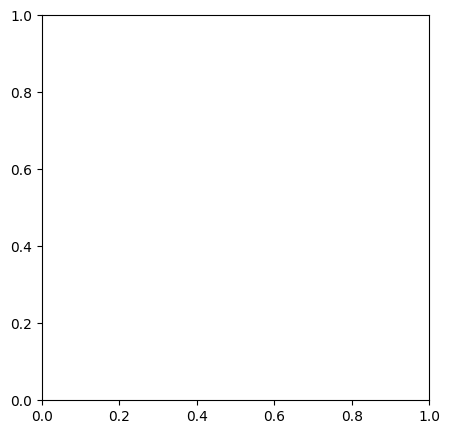

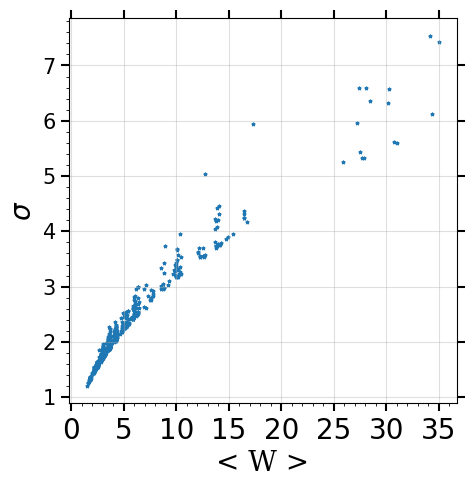

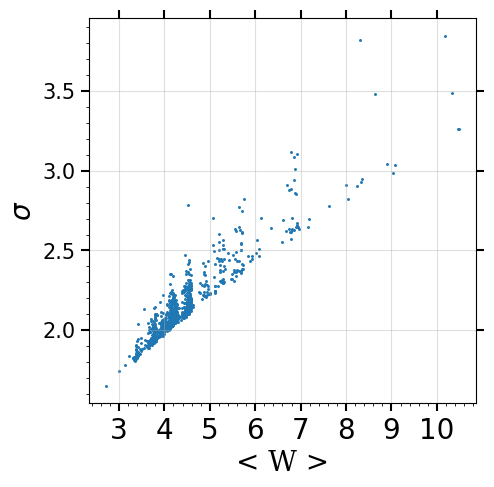

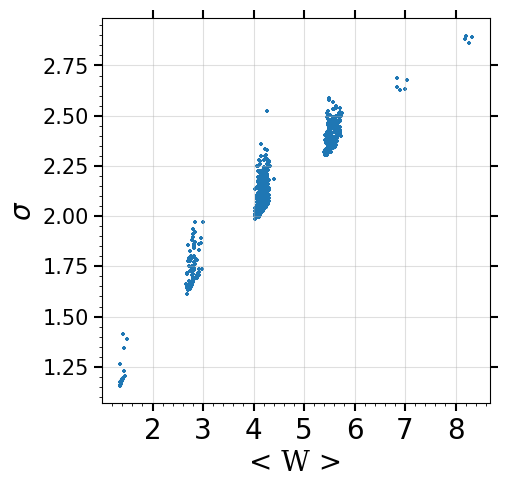

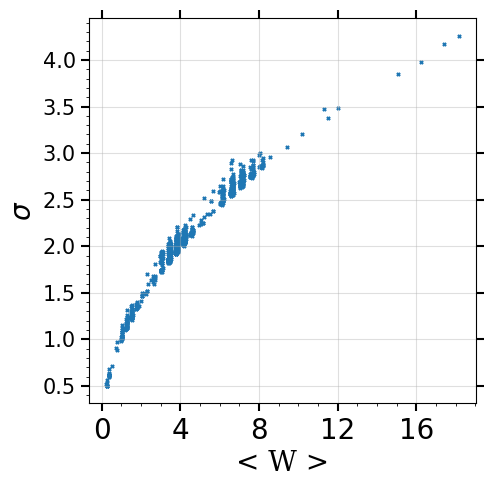

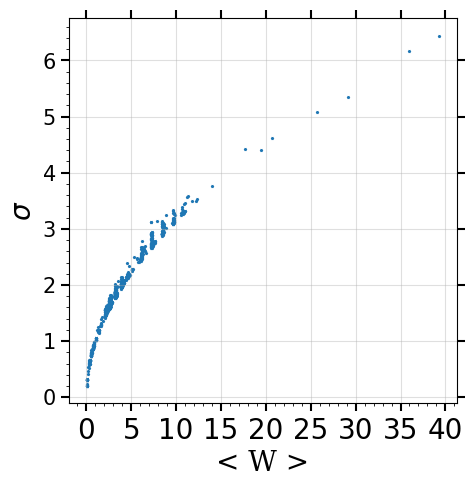

In [ ]:
font = {'family': 'serif',
         'color':  'black',
        'weight': 'normal',
        'size': 20}
fig=plt.figure(figsize=(5,5))
ax = fig.gca()
xlabel,ylabel,title="< W >",r"$\sigma$",""
#xlabel=r"$\sigma$"
for i,j,k in zip(["m_2","m_1","0","1","2"],[-2,-1,0,1,2],['*','.','+','x','1']):
  fig=plt.figure(figsize=(5,5))
  ax = fig.gca()
  mean_walkers =np.array(df_node["mw_"+i])
  std_walkers=np.array(df_node["sw_"+i])
  #bins=np.arange(0,np.max(mean_walkers)+1,1)
  plt.scatter(mean_walkers,std_walkers,s=5,marker=k,label=r"$\alpha = $"+str(j))
  #plt.show()
  #plt.hist(mean_walkers,bins=bins, density=False,histtype='step',align="mid",cumulative=0,label=r"$\alpha = $"+str(j))
  #plt.hist(mean_walkers, bins=50, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align="mid", orientation='vertical', rwidth=1, log=False, color=None, label=None, stacked=False)
  plt.xlabel(xlabel,font)
  plt.ylabel(ylabel,font)
  plt.title(title)
  plt.tick_params(bottom=True, top=True, left=True, right=True,length=6, width=1.5)
  plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,length=6, width=1.5)
  ax.xaxis.set_minor_locator(AutoMinorLocator())
  ax.yaxis.set_minor_locator(AutoMinorLocator())
  plt.grid(alpha=0.4)
  plt.xticks(fontsize=20)
  if j==1:
     plt.xticks([0,4,8,12,16],fontsize=20)
  plt.yticks(fontsize=15)
  #plt.legend()
  plt.show()
#plt.yscale("log")
#plt.xscale("log")
#plt.show()

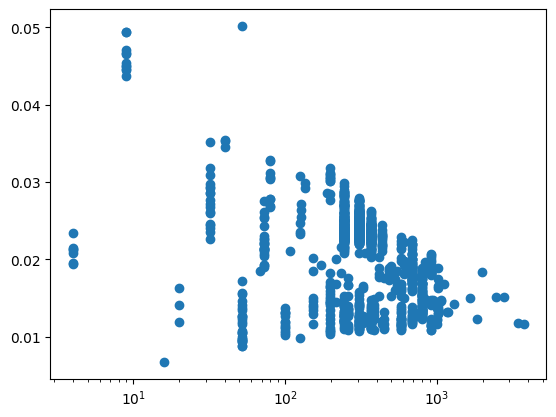

In [ ]:
plt.scatter(strength.values(),df_node["EE_2"])
plt.xscale("log")

#Distribution of Standard deviation of numbers of walkers computed for all nodes

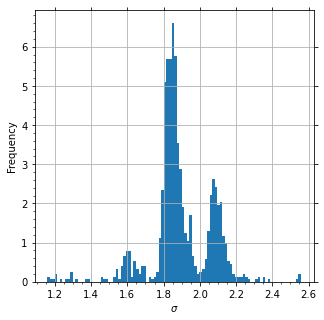

In [ ]:
std_walkers =np.array(df_node["sw"])
bins=[i for i in range(0,int(max(std_walkers))+2)]
xlabel,ylabel,title=r"$\sigma$","Frequency",""
HistoGram(std_walkers ,100,True,1,xlabel,ylabel,'mid',title,(5,5))

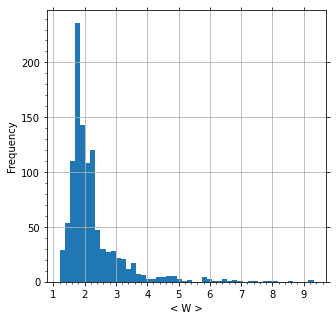

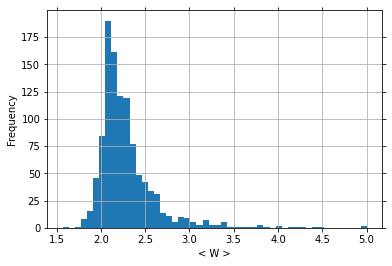

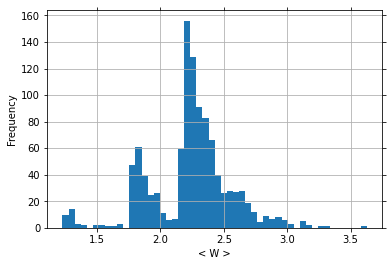

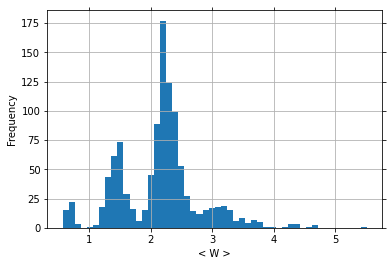

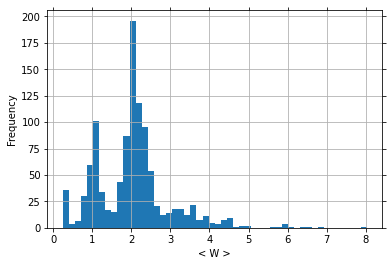

In [ ]:
fig=plt.figure(figsize=(5,5))
ax = fig.gca()
xlabel,ylabel,title="< W >","Frequency",""
for i in ["m_2","m_1","0","1","2"]:
  std_walkers =np.array(df_node["sw_"+i])
  plt.hist(std_walkers, bins=50, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align="mid", orientation='vertical', rwidth=1, log=False, color=None, label=None, stacked=False)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.tick_params(bottom=True, top=True, left=True, right=True)
  plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
  ax.xaxis.set_minor_locator(AutoMinorLocator())
  ax.yaxis.set_minor_locator(AutoMinorLocator())
  plt.grid()
  plt.show()

In [ ]:
#HistoGram(closeness1,100,False,1,r"$C_B$",r"$P(C_B)$","mid","",(6,6))
font = {'family': 'serif',
         'color':  'black',
        'weight': 'normal',
        'size': 20}
fig=plt.figure(figsize=(6,6))
ax = fig.gca()
xlabel,ylabel,title="< W >","Frequency",""
for i,j in zip(["m_2","m_1","0","1","2"],[-2,-1,0,1,2]):
  std_walkers =np.array(df_node["sw_"+i])
  plt.hist(std_walkers,bins=100, density=False,histtype='step',cumulative=0,label=r"$\alpha=$"+str(j))
#plt.hist(bw_c,bins=100, density=True,histtype='step',cumulative=1)
plt.xlabel(xlabel,font)
plt.grid(alpha=0.4)
plt.legend()
plt.ylabel(ylabel,font)
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
#fig.tight_layout()
plt.show()

#Variation of $\sigma$ with $<w>$ computed for all nodes

In [ ]:
xarr,yarr=mean_walkers,std_walkers
xlabel,ylabel,title="<W>",r'$ \sigma $',""
scatter_Plot(xarr,yarr,xlabel,ylabel,title,dotsize=5,opacity=0.6,marker=".",fsize=fsize)

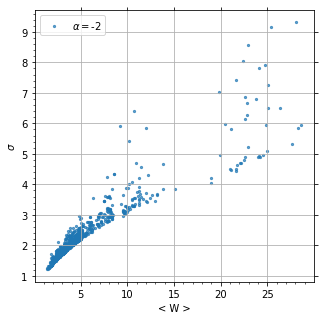

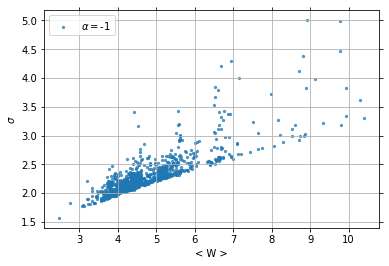

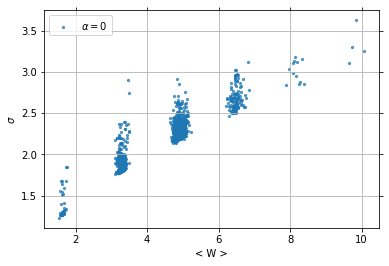

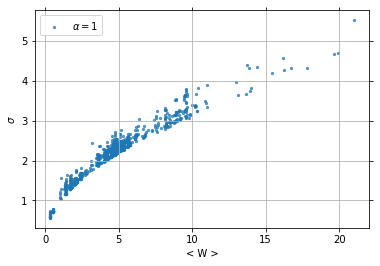

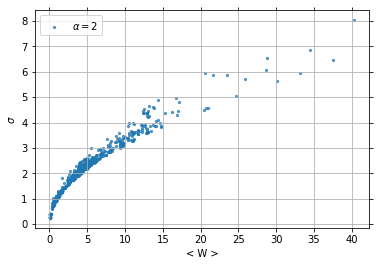

In [ ]:
fig=plt.figure(figsize=(5,5))
ax = fig.gca()
xlabel,ylabel,title="< W >",r"$\sigma$",""
for i,j in zip(["m_2","m_1","0","1","2"],[-2,-1,0,1,2]):
  mean_walkers =np.array(df_node["mw_"+i])
  std_walkers =np.array(df_node["sw_"+i])
  plt.scatter(mean_walkers,std_walkers,s=5, label=r"$\alpha=$"+str(j), norm=None,vmin=None, vmax=None, alpha=0.7, linewidths=None, edgecolors=None, plotnonfinite=False, data=None)
  #plt.plot(xarr,yarr,label=labels,ls=":")
  plt.grid()
  plt.legend()
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.tick_params(bottom=True, top=True, left=True, right=True)
  plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
  ax.xaxis.set_minor_locator(AutoMinorLocator())
  ax.yaxis.set_minor_locator(AutoMinorLocator())
  plt.show()


##**Variation of average number of walkers with degree of nodes**

<Figure size 432x360 with 0 Axes>

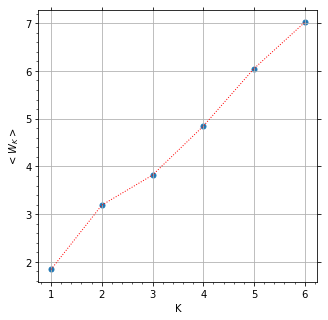

In [ ]:
xarr,yarr=df_deg["Deg"],df_deg["mw"]
fig=plt.figure(figsize=(6,5))
xlabel="K"
ylabel=r"$<W_K>$"
title=""
scatter_Plot(xarr,yarr,xlabel,ylabel,title,dotsize=25,opacity=1,marker="o")
plt.plot(xarr,yarr,color="r",ls=':',lw=1)
#curve_fitting(xarr,yarr)

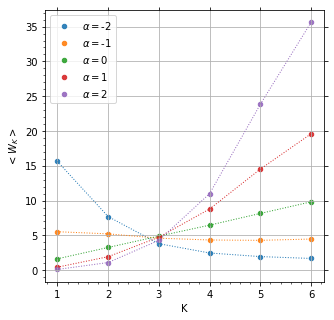

In [ ]:
fig=plt.figure(figsize=(5,5))
ax = fig.gca()
xlabel,ylabel,title="K",r"$< W_K >$",""
for i,j in zip(["m_2","m_1","0","1","2"],[-2,-1,0,1,2]):
  xarr,yarr =np.array(df_deg["Deg"]),np.array(df_deg["mw_"+i])
  plt.plot(xarr,yarr,ls=':',lw=1)
  plt.scatter(xarr,yarr,s=20, label=r"$\alpha=$"+str(j), norm=None,vmin=None, vmax=None, alpha=0.9, linewidths=None, edgecolors=None, plotnonfinite=False, data=None)
#plt.plot(xarr,yarr,label=labels,ls=":")
plt.grid()
plt.legend()
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

##**Variation of Std of number of walkers with degree of nodes**

In [ ]:
xarr,yarr=df_deg["Deg"],df_deg["sw"]
fig=plt.figure(figsize=(6,5))
xlabel="K"
ylabel=r"$\sigma_K$"
title=""
scatter_Plot(xarr,yarr,xlabel,ylabel,title,dotsize=25,opacity=1,marker="o")
plt.plot(xarr,yarr,color="r",ls=':',lw=1)
#curve_fitting(xarr,yarr)

KeyError: ignored

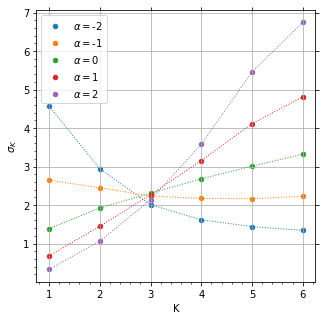

In [ ]:
fig=plt.figure(figsize=(5,5))
ax = fig.gca()
xlabel,ylabel,title="K",r"$\sigma_K$",""
xarr =np.array(df_deg["Deg"])
for i,j in zip(["m_2","m_1","0","1","2"],[-2,-1,0,1,2]):
  Std_walk_nodewise=np.array(df_node["sw_"+i])
  Std_walk_degreewise={i[0]:np.mean(np.array([Std_walk_nodewise[j] for j in i[1]])) for i in nodes_same_deg}
  #df_deg['sw']=np.array(list(Std_walk_degreewise.values()))
  Std_deg=np.array(list(Std_walk_degreewise.values()))
  yarr =Std_deg
  plt.plot(xarr,yarr,ls=':',lw=1)
  plt.scatter(xarr,yarr,s=20, label=r"$\alpha=$"+str(j), norm=None,vmin=None, vmax=None, alpha=1, linewidths=None, edgecolors=None, plotnonfinite=False, data=None)
#plt.plot(xarr,yarr,label=labels,ls=":")
plt.grid()
plt.legend()
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

##**Variation of Average number of walkers with standard deviation**

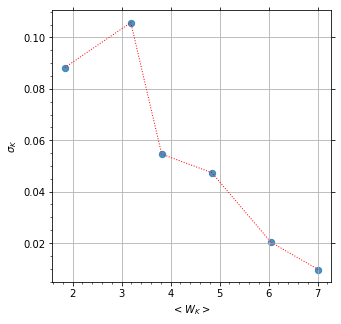

In [ ]:
xarr=df_deg["mw"]
yarr=df_deg["sw"]
xlabel,ylabel,title=r"$<W_K>$",r"$\sigma_K$",""
scatter_Plot(xarr,yarr,xlabel,ylabel,title,dotsize=40,opacity=0.8,marker="o")
plt.plot(xarr,yarr,color="r",ls=':',lw=1)
#curve_fitting(xarr,yarr)

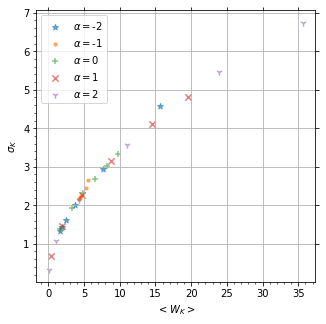

In [ ]:
fig=plt.figure(figsize=(5,5))
ax = fig.gca()
xlabel,ylabel,title=r"$<W_K>$",r"$\sigma_K$",""
for i,j,k in zip(["m_2","m_1","0","1","2"],[-2,-1,0,1,2],['*','.','+','x','1']):
  xarr,yarr =np.array(df_deg["mw_"+i]),np.array(df_deg["sw_"+i])
  #plt.plot(xarr,yarr,ls=':',lw=2)
  plt.scatter(xarr,yarr,s=40,marker=k, label=r"$\alpha=$"+str(j), norm=None,vmin=None, vmax=None, alpha=0.6, linewidths=None, edgecolors=None, plotnonfinite=False, data=None)
  #plt.plot(xarr,yarr,label=labels,ls=":")
  plt.grid()
  plt.legend()
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.tick_params(bottom=True, top=True, left=True, right=True)
  plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
  ax.xaxis.set_minor_locator(AutoMinorLocator())
  ax.yaxis.set_minor_locator(AutoMinorLocator())
  #plt.show()

#Extreme Event Probability

##Distribtion of EE values computed for all nodes

In [ ]:
ExtremeEventN_values=df_node["EE_P"]
bins=100
xlabel,ylabel,title=r"$P_{ee}$","Frequency",""
HistoGram(ExtremeEventN_values,bins,False,1,xlabel,ylabel,'mid',title,fsize)

##Variation of Probability of Occurrence of extreme event with degree of nodes

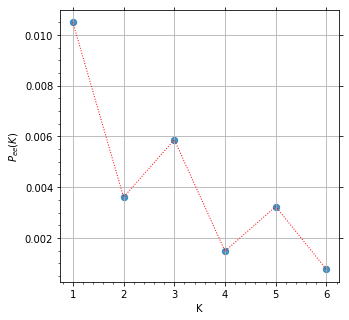

In [ ]:
xarr=df_deg["Deg"]
yarr=df_deg["EE_P"]
xlabel,ylabel,title="K",r"$P_{ee}(K)$",""
scatter_Plot(xarr,yarr,xlabel,ylabel,title,dotsize=40,opacity=0.8,marker="o")
plt.plot(xarr,yarr,color="r",ls=':',lw=1)
#curve_fitting(xarr,yarr)

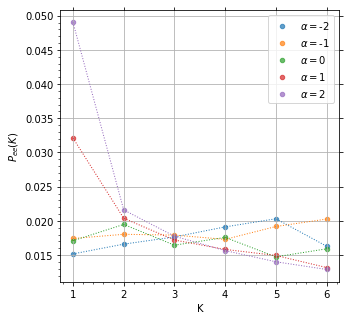

In [ ]:
fig=plt.figure(figsize=(5,5))
ax = fig.gca()
xlabel,ylabel,title="K",r"$P_{ee}(K)$",""
for i,j in zip(["m_2","m_1","0","1","2"],[-2,-1,0,1,2]):
  xarr,yarr =np.array(df_deg["Deg"]),np.array(df_deg["EE_"+i])
  plt.plot(xarr,yarr,ls=':',lw=1)
  plt.scatter(xarr,yarr,s=20, label=r"$\alpha=$"+str(j), norm=None,vmin=None, vmax=None, alpha=0.7, linewidths=None, edgecolors=None, plotnonfinite=False, data=None)
#plt.plot(xarr,yarr,label=labels,ls=":")
plt.grid()
plt.legend()
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

#Recurrence Time Interval

##Distribution of average recurrence time interval values computed for all nodes

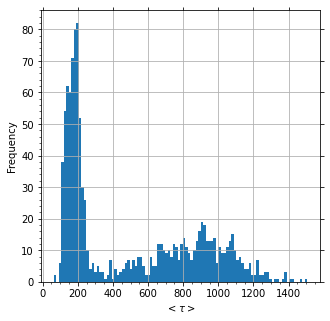

In [ ]:
ExtremeEventN_values=df_node["m_recTime"]
bins=100
xlabel,ylabel,title=r"$<\tau>$","Frequency",""
HistoGram(ExtremeEventN_values,bins,False,1,xlabel,ylabel,'mid',title,fsize)

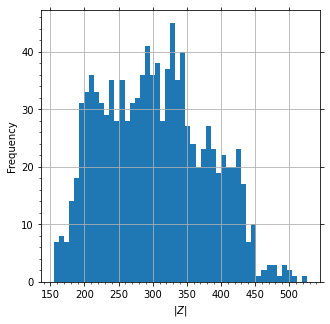

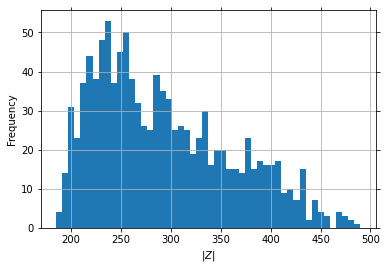

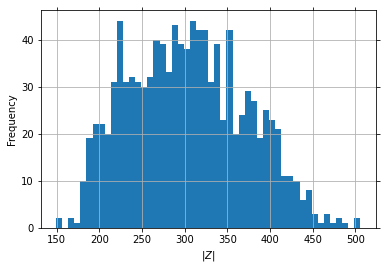

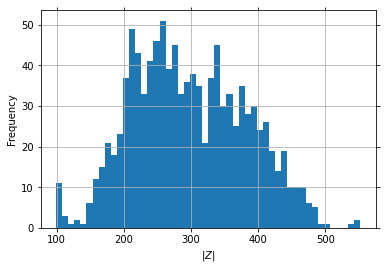

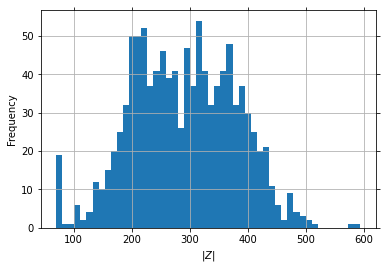

In [ ]:
fig=plt.figure(figsize=(5,5))
ax = fig.gca()
xlabel,ylabel,title=r"$\vert Z \vert$","Frequency",""
for i in ["m_2","m_1","0","1","2"]:
  values=np.array(df_node["m_recT_"+i])
  plt.hist(values, bins=50, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align="mid", orientation='vertical', rwidth=1, log=False, color=None, label=None, stacked=False)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.tick_params(bottom=True, top=True, left=True, right=True)
  plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
  ax.xaxis.set_minor_locator(AutoMinorLocator())
  ax.yaxis.set_minor_locator(AutoMinorLocator())
  plt.grid()
  plt.show()

##Variation of Average recurrence time interval of extreme event with degree of nodes

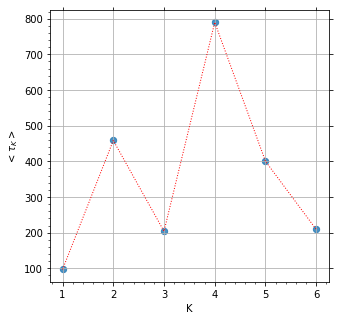

In [ ]:
xarr=df_deg["Deg"]
yarr=df_deg["m_recTime"]
xlabel,ylabel,title="K",r"$<\tau_K>$",""
scatter_Plot(xarr,yarr,xlabel,ylabel,title,dotsize=40,opacity=0.8,marker="o")
plt.plot(xarr,yarr,color="r",ls=':',lw=1)
#curve_fitting(xarr,yarr)

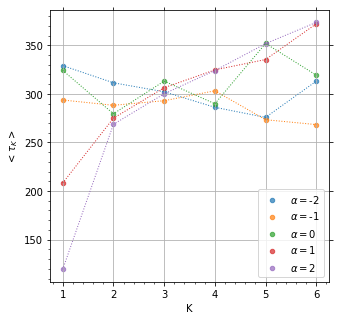

In [ ]:
fig=plt.figure(figsize=(5,5))
ax = fig.gca()
xlabel,ylabel,title="K",r"$<\tau_K>$",""
for i,j in zip(["m_2","m_1","0","1","2"],[-2,-1,0,1,2]):
  xarr,yarr =np.array(df_deg["Deg"]),np.array(df_deg["m_recT_"+i])
  plt.plot(xarr,yarr,ls=':',lw=1)
  plt.scatter(xarr,yarr,s=20, label=r"$\alpha=$"+str(j), norm=None,vmin=None, vmax=None, alpha=0.7, linewidths=None, edgecolors=None, plotnonfinite=False, data=None)
#plt.plot(xarr,yarr,label=labels,ls=":")
plt.grid()
plt.legend()
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

#Average Absolute Magnitude difference of maginute of successive EE

##Distribution  

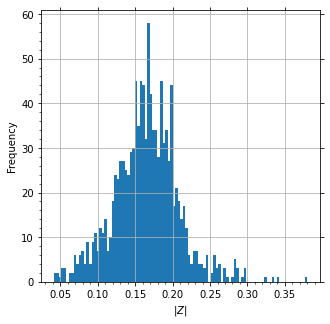

In [ ]:
ExtremeEventN_values=df_node["m_absDiff"]
bins=100
xlabel,ylabel,title=r"$\vert Z \vert$","Frequency",""
HistoGram(ExtremeEventN_values,bins,False,1,xlabel,ylabel,'mid',title,fsize)

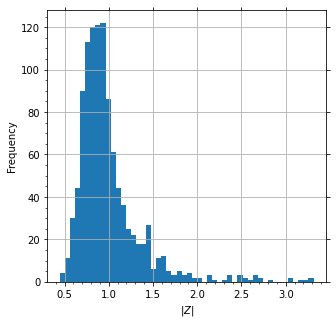

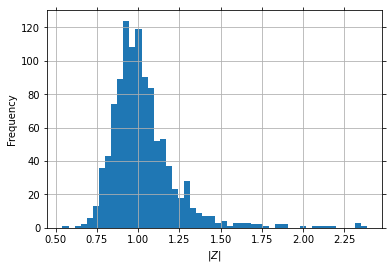

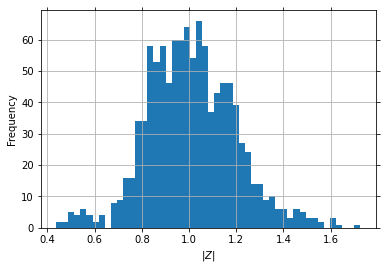

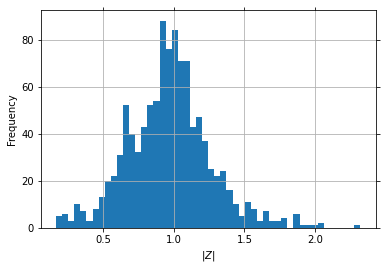

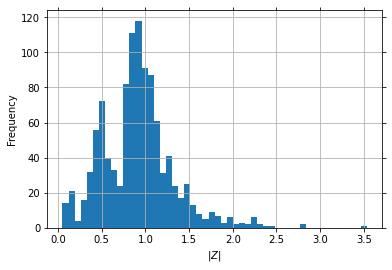

In [ ]:
fig=plt.figure(figsize=(5,5))
ax = fig.gca()
xlabel,ylabel,title=r"$\vert Z \vert$","Frequency",""
for i in ["m_2","m_1","0","1","2"]:
  values=np.array(df_node["m_absDiff_"+i])
  plt.hist(values, bins=50, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align="mid", orientation='vertical', rwidth=1, log=False, color=None, label=None, stacked=False)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.tick_params(bottom=True, top=True, left=True, right=True)
  plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
  ax.xaxis.set_minor_locator(AutoMinorLocator())
  ax.yaxis.set_minor_locator(AutoMinorLocator())
  plt.grid()
  plt.show()

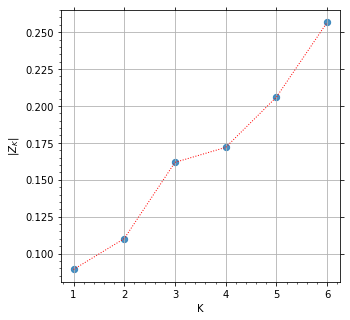

In [ ]:
xarr=df_deg["Deg"]
yarr=df_deg["m_absDiff"]
xlabel,ylabel,title="K",r"$\vert Z_K \vert$",""
scatter_Plot(xarr,yarr,xlabel,ylabel,title,dotsize=40,opacity=0.8,marker="o")
plt.plot(xarr,yarr,color="r",ls=':',lw=1)
#curve_fitting(xarr,yarr)

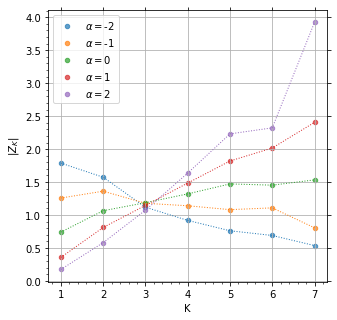

In [ ]:
fig=plt.figure(figsize=(5,5))
ax = fig.gca()
xlabel,ylabel,title="K",r"$\vert Z_K \vert$",""
for i,j in zip(["m_2","m_1","0","1","2"],[-2,-1,0,1,2]):
  xarr,yarr =np.array(df_deg["Deg"]),np.array(df_deg["m_absDiff_"+i])
  plt.plot(xarr,yarr,ls=':',lw=1)
  plt.scatter(xarr,yarr,s=20, label=r"$\alpha=$"+str(j), norm=None,vmin=None, vmax=None, alpha=0.7, linewidths=None, edgecolors=None, plotnonfinite=False, data=None)
#plt.plot(xarr,yarr,label=labels,ls=":")
plt.grid()
plt.legend()
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())